In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [9]:
iris = load_iris()

In [12]:
X = iris.data
y = iris.target

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [21]:
model = keras.models.Sequential([
    keras.layers.Dense(300, input_shape=(4,), activation="relu"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(500, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(3, activation="softmax")
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               1500      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               50500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

In [30]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, batch_size=5, epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 1.1660 - accuracy: 0.3619
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.7322 - accuracy: 0.6286
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.6762
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.7238
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.7048
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8190
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8381
Epoch 8/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.9143
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8476
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.2968 - accuracy: 0.8857
Epoch 11/

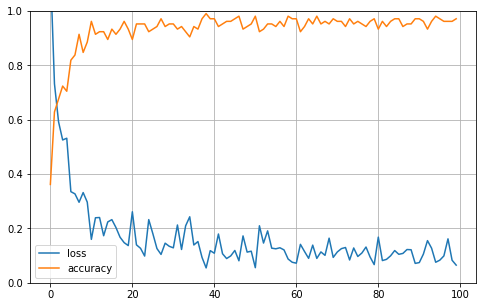

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [37]:
results = model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0389 - accuracy: 0.9778


In [38]:
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.038859
Final test set accuracy: 0.977778


In [43]:
class_names = iris.target_names

In [44]:
X_new = X_test[:5]

In [47]:
y_pred = model.predict(X_new)
y_pred = np.round(y_pred).astype(int)
print(np.array(class_names)[y_pred])

[['setosa' 'versicolor' 'setosa']
 ['versicolor' 'setosa' 'setosa']
 ['setosa' 'setosa' 'versicolor']
 ['setosa' 'versicolor' 'setosa']
 ['setosa' 'versicolor' 'setosa']]
